<h1 align="center">INF280 - Laboratorio de Estadística Computacional</h1>
<center>
<img src="https://prod-discovery.edx-cdn.org/media/course/image/381a0046-5d78-4790-8776-74620d59f48e-b5fbe38528ea.small.png" width="40%"></img>

<h2 align="center">LEC 4: Construcción Intervalos de confianza Bootstrap paramétrico</h2>

<i> Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - Marzo 2020.</i>
</center>


# Objetivo

Aprender a utilizar la herramienta de estadística para el análisis de datos.

## Instrucciones

* Esta evaluación debe ser desarrollado en parejas defininidas al comienzo del semestre. Cualquier cambio debe ser informado previamente al ayudante para su autorización.
* La evaluación consiste en el desarrollo de este notebook. Completando código donde sea indicado y respondiendo las preguntas planteadas.
* Debe argumentar sus respuestas basándose en los resultados obtenidos en sus experimentos. De no ser así, no podrán optar al puntaje máximo de la pregunta.
* Los gráficos deben ser legibles y fáciles de entender. Esto es utilizar el gráfico adecuado al problema; usar escalas correctas; incluir títulos, nombres de ejes y leyenda.
* El código debe ser legible, comente de manera adecuada y evite la modularización (_simple is better than complex - [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3)_)
* Cualquier consulta o queja debe realizarse a través de la plataforma Moodle.
* El formato de entrega es **GrupoXX_LECN.ipynb**, donde _XX_ es grupo asignado y _N_ el LEC correspondiente. (i.e Grupo03_LEC1.ipynb) 
* Por cada día de atraso se descuentan 10 puntos de la nota máxima a alcanzar.
* Los trabajos que sean resultado de copia o plagio de otros trabajos, serán automáticamente evaluados con nota 0.

* Esta evaluación debe ser desarrollada y entragada durante la sesión del laboratorio. El dia **Jueves 05 de Marzo en el bloque 11-12**. 


## Aprendizaje Esperado

Los y las estudiantes deben ser capaces de:

* Utilizar las herramientas básicas para la implementación de métodos y algoritmos estadisticos. (Python o R-Project).

* Ser capaces de realizar un análisis comparativos entre gráficos y resultados obteniendo conclusiones que se infieren de este mismo análisis.



## Actividad

Lea las siguientes preguntas y responda de manera clara y precisa. Algunas de estas requieren de completar o implementar funciones, no edite funciones si no se les indica. 

El puntaje máximo es de 100, cada pregunta indica su puntaje asignado.

Dispone de **60 minutos** para su resolución.

### Información del Grupo






| Rol| Nombre | Correo |
| ---------- | ---------- | ---------- |
| COMPLETAR  | COMPLETAR   | COMPLETAR |
| COMPLETAR   | COMPLETAR  | COMPLETAR |



## El Método de Bootstrap

<center>
<img src="https://miro.medium.com/max/1541/1*iH5w0MBdiOlxDOCX6nmqqw.png" width="80%"></img>
</center>

El método de Bootstrapping es un método de remuestreo usado para la estimación de algún parámetro $\theta$ de la distribución de una población, del cual solo tenemos disponible una muestra.

Este método consiste en que, dado una población con una distribución $F(\theta)$, de la cual solo se dispone de una muestra $\mathcal{X}$ de tamaño $n$:

$$\mathcal{X} = x_1, ..., x_n$$

Obtenemos $B$ remuestreos desde $\mathcal{X}$ con reemplazo (podemos elegir varias veces el mismo sujeto $x_j$) cada una de tamaño $n$.

$$\mathcal{X}^*_i =  x^*_1, ..., x^*_n$$
$$ i \in [1,B]$$

Para cada una de los remuestreos, calculamos la estadística de interés $\hat{\theta}_i$, obteniendo un vector $\hat{\theta}^*$ de $B$ estimaciones de $\theta$:

$$\hat{\theta}^* = \hat{\theta}_1, ..., \hat{\theta}_i, ..., \hat{\theta}_B $$

Reordenando este vector $\hat{\theta}^*$, podemos obtener una distribución de las aproximaciones de $\theta$, y de este obtener un intervalo de confianza para algún nivel de confianza $\alpha$.

A continuación, implementaremos este algoritmo para estimar el parámetro $\mu$ de una muestra proviniente de una distribución normal $X(\mu, 4)$. Luego útilizaremos este algoritmo para estimar el parámetro $\alpha$ de las distribución gamma $G(\alpha, \beta)$ ajustada a una imagen con distintos niveles de contraste. 

* (<font color='red'>15 Puntos</font>) Defina el concepto de **intervalo de confianza** y el **nivel de confianza** $\alpha$.

**Respuesta**


<font color="greed"> COMPLETAR </font> 

In [0]:
from numpy.random import normal, gamma, choice
from numpy import percentile

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage

%matplotlib inline

## Estimación de $\mu$ para $\mathcal{X}(\mu, 4)$

En esta sección se debe estimar el parámetro $\mu$ para una muetra que proviene de una distribución normal $\mathcal{X}(\mu, 4)$. Para esto, implementaremos el método de Bootstap. 

Este método podemos separarlo en pasos para una fácil implementación.

1. Obtener un remuestro de tamaño $n$ con reemplazo a partir de una muestra de tamaño $n$.
2. Calcular un estadístico (o estimador) para $B$ remuestros.
3. Obtener un intervalo de confianza de $B$ estimaciones para un valor de confianza $\alpha$.

Para esta implementación estaremos considerando la siguiente muestra:

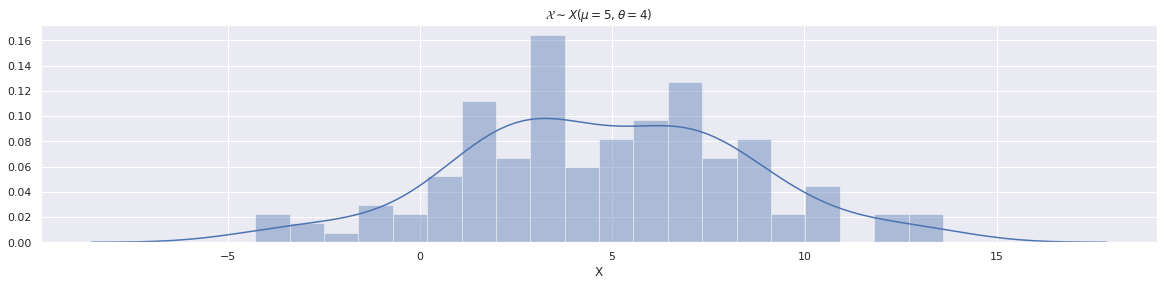

In [0]:
# Fijar semilla de numeros aleatorios para obtener resultados replicables
np.random.seed(13)

# Parametros de la distribucion
mu_real = 5
size_n  = 150

# Muestra de tamaño n
X = normal(mu_real, 4, size_n)

# Barplot
plt.figure(figsize=(20,4))
sns.distplot(X, bins=20)
plt.xlabel("X")
plt.title("$\mathcal{X} \sim X(\mu=5, \\theta =4)$");

### 1. Remuestro

* (<font color='red'>8 Puntos</font>) Complete el siguiente código para obtener un remuestro con reemplazo a partir de una muestra aleatoria.

In [0]:
def resampling(X, seed=None):
  """
  Dado una muestra aleatoria X de tamaño n, obtener un remuestro
  del mismo tamaño con reemplazo.

  Argumentos:
    X (array):  Muestra aleatoria, arreglo unidimensional de tamaño n.
    seed (int): Usar semilla, para obtener resultados replicables.

  Retorno:
    X_star (array): Resampleo, arreglo unidimensional del mismo tamaño que X.
  """
  if seed is not None:
    np.random.seed(seed)

  # COMPLETAR
  n = len(X)
  X_star = choice(X, n, replace=True)

  return X_star

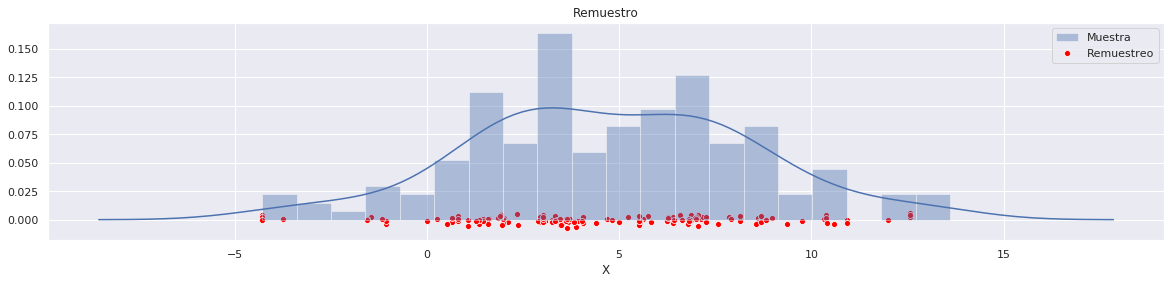

In [0]:
X_star = resampling(X, 420)

plt.figure(figsize=(20,4))
plt.title("Remuestro")
sns.distplot(X, bins=20, label="Muestra")
plt.xlabel("X")
sns.scatterplot(X_star, normal(scale=0.0025, size=len(X)), color="red", label="Remuestreo");

### 2. Estimación

En este paso debemos calcular un estadístico (o estimador),  para los $B$ remuestros. Dividimos esta implementación en dos funciones. 

* (<font color='red'>10 Puntos</font>) La función ```estimator_mu```, computa la estimación de un parámetro $\theta$ para una muestra. En este caso se busca estimar el parámetro $\mu$ de una distribución normal.  Se elige el estimador que posea mejores propiedades que los restantes, como insesgadez, eficiencia, convergencia y robustez. Para una distribución normal sabemos que el media muestral $\bar{X}$ es un buen estimador para la media $\mu$.

* (<font color='red'>6 Puntos</font>) La función ```estimate_distribution``` obtiene una distribución de las estimaciones al aplicar ```estimator_mu``` a cada una de los remuestreos.

Implemente las funciones descritas.

In [0]:
def estimator_mu(X):
  """
  Obtiene la estimación de mu para una muestra X que proviene de una distribución X.

  Argumentos:
    X (array):  Muestra aleatoria, arreglo unidimensional de tamaño n.
  Retorno:
    mu_estimation (float): Estimación de mu.
  """

  # COMPLETAR
  mu_estimation = X.mean()

  return mu_estimation

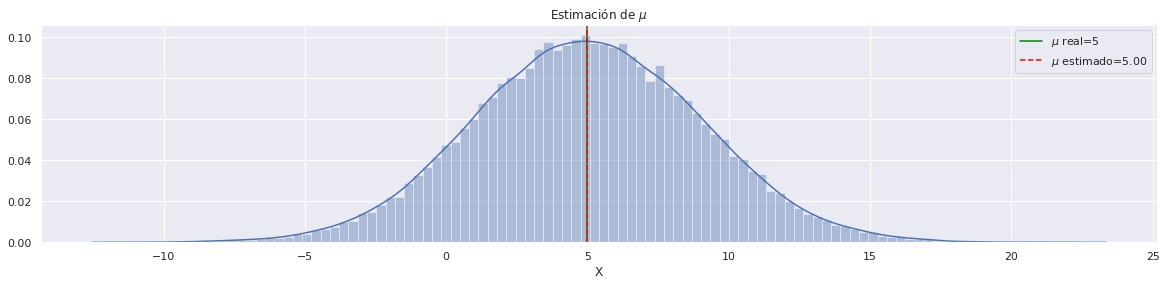

In [0]:
X_big_sample = normal(mu_real, 4, 40000)
mu_estimation = estimator_mu(X_big_sample)

plt.figure(figsize=(20, 4))
sns.distplot(X_big_sample, bins=100)
plt.axvline(mu_real, color="green", label=f"$\mu$ real={mu_real}")
plt.axvline(mu_estimation, color="red", ls='--', label=f"$\mu$ estimado={mu_estimation:.2f}")
plt.legend()
plt.xlabel("X")
plt.title("Estimación de $\mu$");

In [0]:
def estimate_distribution(Xs, estimator):
  """
  Obtiene la estimación de mu para una muestra X que proviene de una distribución X.

  Argumentos:
    Xs   (list of array):  Lista de B muestra aleatoria, cada muestra es un 
                            arreglo unidimensional de tamaño n.
    estimator (function): Función sobre la muestra para estimar un parámetro.
  Retorno:
    estimations (array):  Array de tamaño B con las estimación para cada muestra aleatoria en Xs.
  """

  estimations_list = []
  # COMPLETAR
  for X in Xs:
    estimations_list.append(estimator(X))

  estimations = np.array(estimations_list)
  return estimations

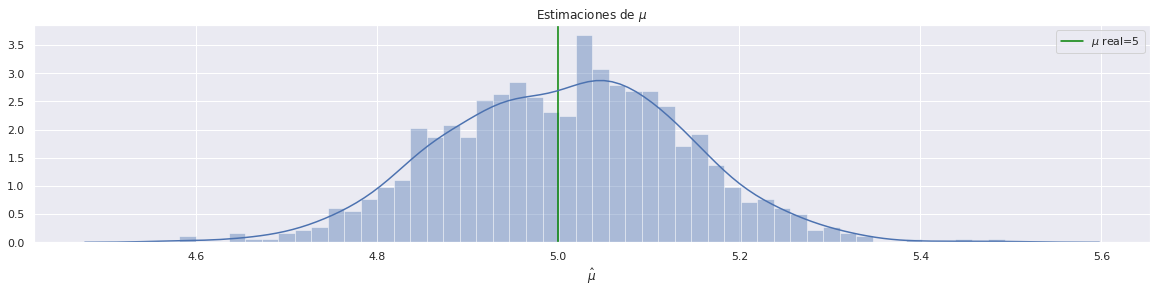

In [0]:
B = 1000
X_big_samples = [normal(mu_real, 4, 1000) for i in range(B)]
mu_estimations = estimate_distribution(X_big_samples, estimator_mu)

plt.figure(figsize=(20, 4))
plt.axvline(mu_real, color="green", label=f"$\mu$ real={mu_real}")
sns.distplot(mu_estimations, bins=50)
plt.xlabel("$\hat{\mu}$")
plt.legend()
plt.title("Estimaciones de $\mu$");

### 3. Intervalo de Confianza

* (<font color='red'>6 Puntos</font>) Obtener un intervalo de confianza de $B$ estimaciones para un valor de confianza $\alpha$.

In [0]:
def confidence_interval(estimations, alpha=0.1):
  """
  Determina el intervalo de confianza (valores de los extremos) con un cierto
  nivel de significancia para una distribucion de estimaciones.

  Argumentos:
    estimations (array):  Array de tamaño B con las estimación para cada muestra aleatoria.
    alpha       (float):  Nivel de significancia. alpha se encuentra en el intervalor [0,1].

  Retorno:
    interval (tuple): valor mínimo y máximo que corresponden al intervalo de confianza
                      para un valor de significancia.
  """
  # Completar
  min_percentil = 100 * alpha/2.
  max_percentil = 100 * (1 - (alpha/2.))

  interval = percentile(estimations, min_percentil), percentile(estimations, max_percentil)

  return interval

In [0]:
arr = np.arange(1, 101)
min_, max_ = confidence_interval(arr, alpha=0.1)
values_in = len(arr[(arr >= min_) & (arr <= max_)])

print(f"El rango [{min_}, {max_}] contiene el {100*values_in/len(arr)}% de los valores.")

El rango [5.95, 95.05] contiene el 90.0% de los valores.


### Todo junto

* (<font color='red'>30 Puntos</font>) Implemente el método de bootstrap completando la función y utilizando las funciones implementadas en las preguntas anteriores. Además ejecute el código de la celda subsiguiente para mostrar el resultado dependiente de B y $\alpha$. ¿Cómo afectan estas dos variables a la estimación de parámetro? 

In [0]:
def bootstrap_interval(X, B, estimator, alpha):
  """
  Obtiene el intervalo de confianza de bootstrap para la estimacion de un parametro
  de la distrucion de la poblacion de la muestra X. Dado la cantidad de muestras
  de bootstrap y un nivel de significancia alpha.

  Argumentos:
    X (array):  Muestra aleatoria, arreglo unidimensional de tamaño n.
    B (int):    Cantidad de remuestreos.
    estimator (function): Función sobre la muestra para estimar un parámetro.
    alpha       (float):  Nivel de significancia. alpha se encuentra en el intervalor [0,1].

  Retorno:
    estimations (array):  Array de tamaño B con las estimacion para cada remuestro.
    interval (tuple): valor mínimo y máximo que corresponden al intervalo de confianza
                      para un valor de significancia.
  """
  Xs = []
  for i in range(B):
    Xs.append(resampling(X))

  estimations = estimate_distribution(Xs, estimator)
  interval = confidence_interval(estimations, alpha)

  return estimations, interval

In [0]:
@interact(B=[10, 100, 1000, 5000], alpha=[0.05, 0.1, 0.2, 0.4])
def show(B=10, alpha=0.05):
  estimations, interval = bootstrap_interval(X, B, estimator_mu, alpha)
  
  plt.figure(figsize=(20,4))
  plt.title("Estimaciones de $\mu$")
  plt.axvline(mu_real, color="green", label=f"$\mu$ real={mu_real}")
  plt.axvline(interval[0], color="red", label=f"Intervalo de confianza\n=[{interval[0]:.2f}, {interval[1]:.2f}]")
  plt.axvline(interval[1], color="red")
  sns.distplot(estimations, bins=25,)
  plt.xlabel("$\mu$")
  plt.xlim(3.8, 5.8)
  plt.legend();

interactive(children=(Dropdown(description='B', options=(10, 100, 1000, 5000), value=10), Dropdown(description…

**Respuesta**


<font color="greed"> COMPLETAR </font> 


## Estimación de $\alpha$ para $Gamma(\alpha, \beta)$

Se tienen 3 versiones de contraste para una misma imagen. Si obtenemos un histograma de las intensidades de cada pixel se obtiene una distribución que puede ser modelada por una Gamma.

Determine para cada imagen, un intervalo de confianza con un  nivel de significancia de $0.05$ para el parámetro $\alpha$ de su distribución dado una muestra de sus pixeles. Para esto debe considerer que la función ```estimator``` debe ser implementada para $\alpha$, ```estimator_alpha```.

Considere además las siguientes propiedades de la distribución Gamma:

$$E[X] = \frac{\alpha}{\beta}$$
$$VAR[X] = \frac{\alpha}{\beta^2}$$

In [0]:
from PIL import Image
import requests

imgs = []
for url in [1,2,3]:
  response = requests.get(f"https://labcomp.cl/~sborquez/datasets/images/{url}.png", stream=True)
  img = Image.open(response.raw).convert('LA')
  imgs.append(np.array(img)[:,:,0])
  img.close()

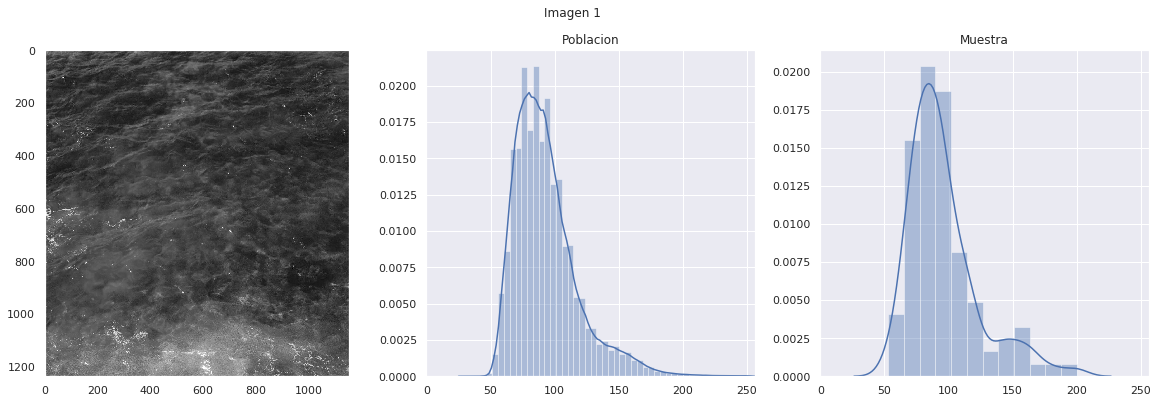

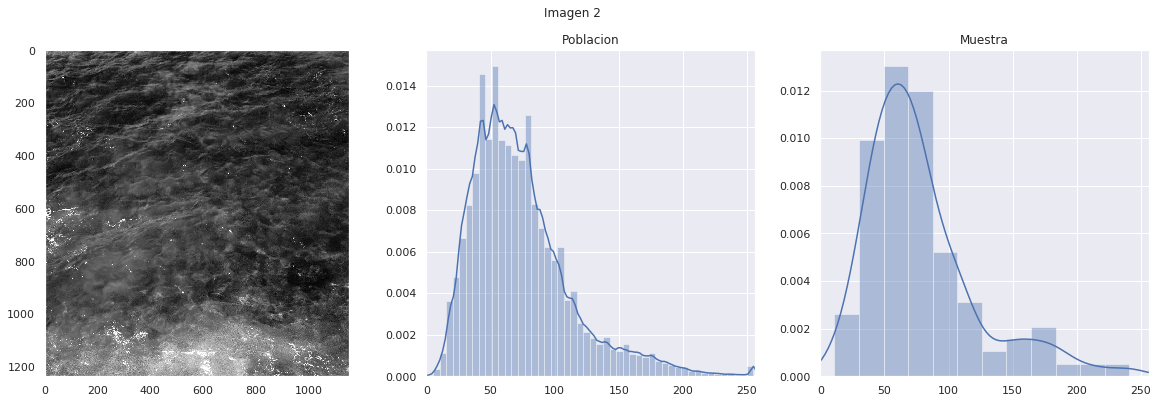

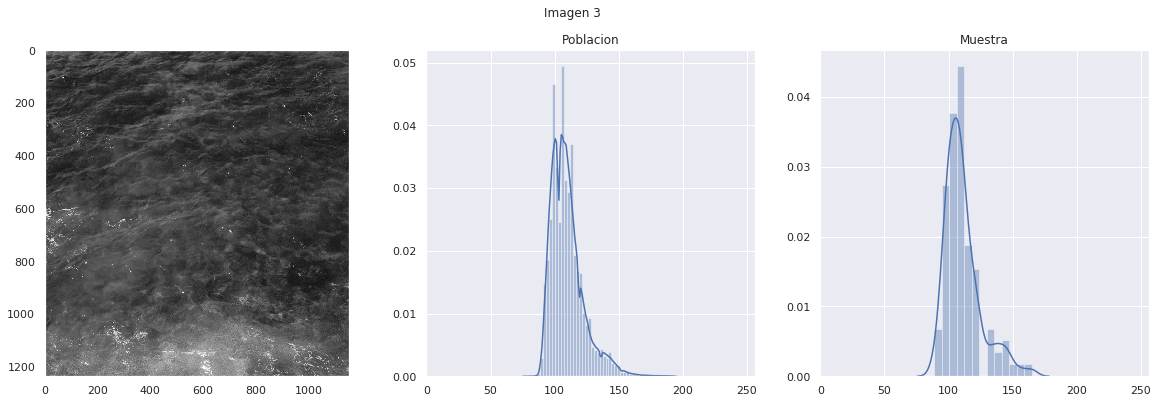

In [0]:
imgs_arr = []
imgs_samples = []
for i, img in enumerate(imgs):
  np.random.seed(420)
  img_arr = img.flatten()
  img_sample = choice(img_arr, 100)

  fig, axs = plt.subplots(1, 3, figsize=(20, 6))
  axs[0].imshow(img, cmap="gray")
  axs[0].grid(False)
  sns.distplot(img_arr, ax=axs[1])
  axs[1].set_title("Poblacion")
  axs[1].set_xlim(0, 256)
  sns.distplot(img_sample, ax=axs[2])
  axs[2].set_title("Muestra")
  axs[2].set_xlim(0, 256)
  
  fig.suptitle(f'Imagen {i+1}')

  imgs_arr.append(img_arr)
  imgs_samples.append(img_sample)
  plt.show()

* (<font color='red'>10 Puntos</font>) Escriba una expresión para  $\alpha$ y y una para  $\beta$ utilizando las expresiones de **Esperanza** y **Varianza** para la distribución **Gamma**, luego complete el código con estas expresiones para calcular los parámetros $\alpha$ y $\beta$ de una Gamma que se ajuste a la distribución empirica de cada imagen.

Buscamos:
$$\alpha = f(E[X], Var[X]) $$
$$\beta = g(E[X], Var[X])$$

**nota:** Las distribuciones son solo aproximaciones.

**Respuesta**


<font color="greed"> COMPLETAR </font> 
$$\alpha = $$
$$\beta = $$

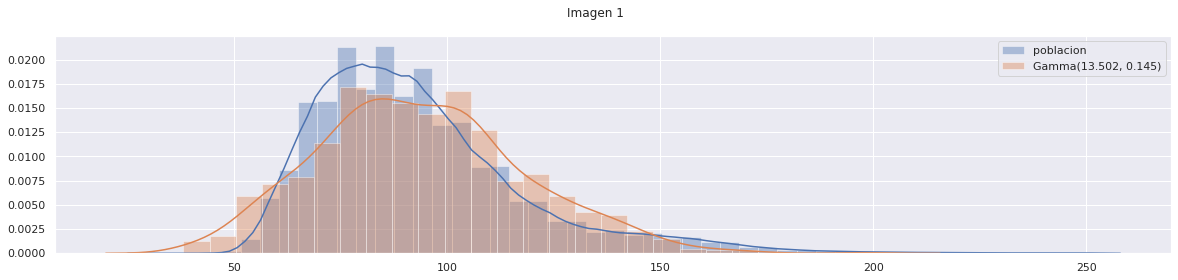

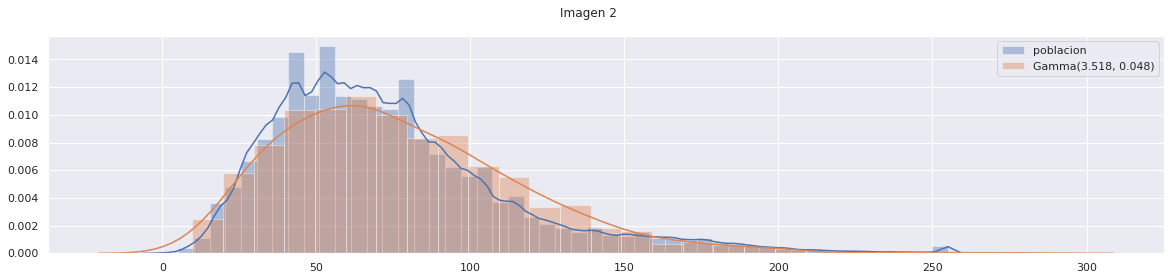

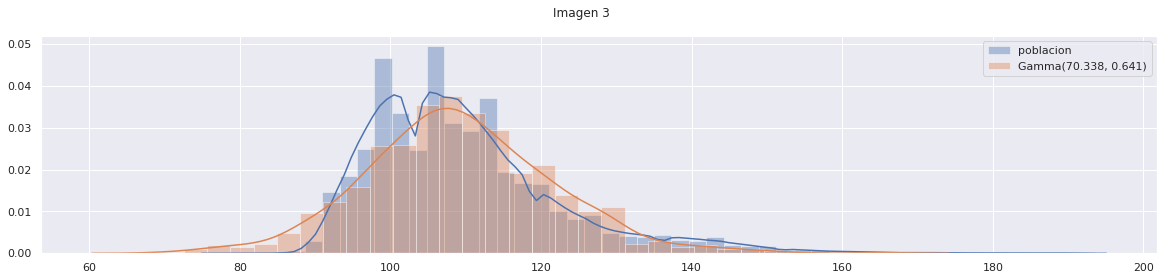

In [0]:
for i, img_arr in enumerate(imgs_arr):
  ## Completar
  alpha = img_arr.mean()**2 / img_arr.var()
  beta = img_arr.mean()/img_arr.var()
  
  plt.figure(figsize=(20,4))
  plt.suptitle(f"Imagen {i+1}")
  sns.distplot(imgs_arr[i], label="poblacion")
  sns.distplot(gamma(alpha, 1/beta, 1000), label=f"Gamma({alpha:.3f}, {beta:.3f})")
  plt.legend()

* (<font color='red'>10 Puntos</font>) Implemente ```estimator_alpha(X)``` y obtenga el intervalo de confianza para cada una de las imagenes

In [0]:
def estimator_alpha(X):
  return X.mean()**2 / X.var()

In [0]:
B = 500
for i, img_arr in enumerate(imgs_samples):
  _, interval = bootstrap_interval(img_arr, B, estimator_alpha, 0.1)
  print(f"Imagen {i+1}: [{interval[0]:.3f}, {interval[1]:.3f}]")

Imagen 1: [9.652, 16.857]
Imagen 2: [2.693, 4.311]
Imagen 3: [46.663, 88.449]


* (<font color='red'>5 Puntos</font>) ¿Concuerda sus resultado con los valores reales? De no ser así indique a que se puede deber. ¿Qué ventajas nos entrega este método para la estimación de parámetros?

**Respuesta**


<font color="greed"> COMPLETAR </font> 

* (<font color='red'>+5 Puntos</font>) Conteste la siguiente encuesta de manera individual: 

Felicidades! han completado el tercer Laboratorio de Estadística Computacional (LEC)

Recuerden contestar todas las preguntas y llenar la tabla con la información de su grupo.